# **Problem Statement**

The client is an insurance company that previously provided health insurance to customers. They are now seeking assistance in developing a predictive model to determine whether policyholders from the previous year would also be interested in purchasing vehicle insurance from the company.

In the context of insurance, a policy refers to an agreement in which an insurance company agrees to provide compensation for specific losses, damages, illnesses, or death in exchange for the payment of a predetermined premium. The premium is the amount of money that the customer must pay on a regular basis to the insurance company in order to receive this guarantee.

Similar to medical insurance, vehicle insurance requires customers to pay a yearly premium to an insurance provider company. This payment guarantees that in the event of an unfortunate accident involving the vehicle, the insurance provider company will offer compensation, also known as a "sum assured," to the customer.

**Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy** to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Information about features in dataset**

1. id  :	 Unique ID for the customer

2. Gender	 :  Gender of the customer

3. Age  :	 Age of the customer

4. Driving_License	0  :  Customer does not have DL, 1 : Customer already has DL

5. Region_Code  :	 Unique code for the region of the customer

6. Previously_Insured : 1 :   Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium 	:  The amount customer needs to pay as premium in the year

10. PolicySalesChannel  : 	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage  :  	Number of Days, Customer has been associated with the company

12. Response :	1 :  Customer is interested, 0 : Customer is not interested

# Loading Libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [152]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [153]:
import warnings
warnings.filterwarnings('ignore')

In [154]:
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

# Loading and exploring dataset

In [155]:
df = pd.read_csv('insurance.csv')

In [156]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [157]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [158]:
df.shape

(381109, 12)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


* So, we got `381109` rows and `12` columns in this insurance dataframe.
* Most of the variables are of categorical type except for `Age`, `Annual_Premium` and `Vintage`.
* Looks like there are no null values in this dataset.

In [160]:
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


* Here we could see descriptive statistics of all the columns in the dataset.
* Also, we could see mean, min, max etc values for features like Age, Annual_Premium and Vintage.
* There are no zero values in these columns.

In [161]:
# checking for null values in the dataset
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

This dataset is with zero null values and there is no further cleaning required as well.

In [162]:
# checking number of unique values in each column
for var in list(df.columns):
    print(var, ' contains ', df[var].nunique(), ' values')

id  contains  381109  values
Gender  contains  2  values
Age  contains  66  values
Driving_License  contains  2  values
Region_Code  contains  53  values
Previously_Insured  contains  2  values
Vehicle_Age  contains  3  values
Vehicle_Damage  contains  2  values
Annual_Premium  contains  48838  values
Policy_Sales_Channel  contains  155  values
Vintage  contains  290  values
Response  contains  2  values


In [163]:
# checking value counts for each variable in dataset
for var in list(df.columns):
    print(f'\n\nValue count for {var}:\n {df[var].value_counts()}')



Value count for id:
 1         1
254071    1
254080    1
254079    1
254078    1
         ..
127035    1
127034    1
127033    1
127032    1
381109    1
Name: id, Length: 381109, dtype: int64


Value count for Gender:
 Male      206089
Female    175020
Name: Gender, dtype: int64


Value count for Age:
 24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64


Value count for Driving_License:
 1    380297
0       812
Name: Driving_License, dtype: int64


Value count for Region_Code:
 28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0    

We checked unique values and their counts in each of the columns to get bird's-eye view on internal distribution in each column.

In [164]:
# checking for any duplicate entries in the dataset
df[df.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


There are no duplicate rows in the dataset.

# Exploratory Data Analysis

Looking at the data so far we came up with the following **Initial hypotheses**
1. As age increases the annual premium should also increase.
2. If customer has previous insurance then they are less likely to buy another one.
3. If vehicle age is <1 year then they are less likely to respond positively, as while buying the vehicle people often buy 1 year insurance.
4. If person has damaged vehicle then they are more likely to buy an insurance.
5. Longer the customer is associated with company, they are more likely to respond as yes.


Let's explore the data with visualizations now and infer some insights.

## Univariate

In [165]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [166]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

1. **Response from customers:**

Text(0.5, 1.0, 'Response from the customers')

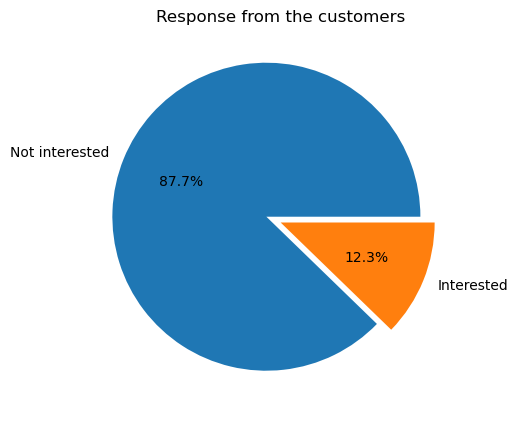

In [167]:
explode = (0.1, 0)
labels = 'Not interested', 'Interested'
plt.pie(df.Response.value_counts(), explode=explode, labels=labels,autopct='%1.1f%%')
plt.title('Response from the customers', size=12)

This is the response from the customers in the dataset, looks like majority of the people are not interested in buying a vehicle insurance from the company and this is the clear case of **imbalance dataset**.

In [168]:
cat_features = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

In [169]:
num_features = ['Age','Region_Code','Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

2. **Countplots for Categorical Features:**

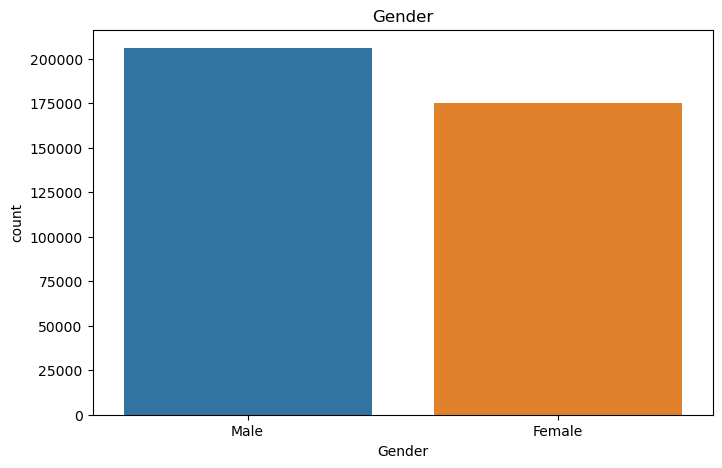

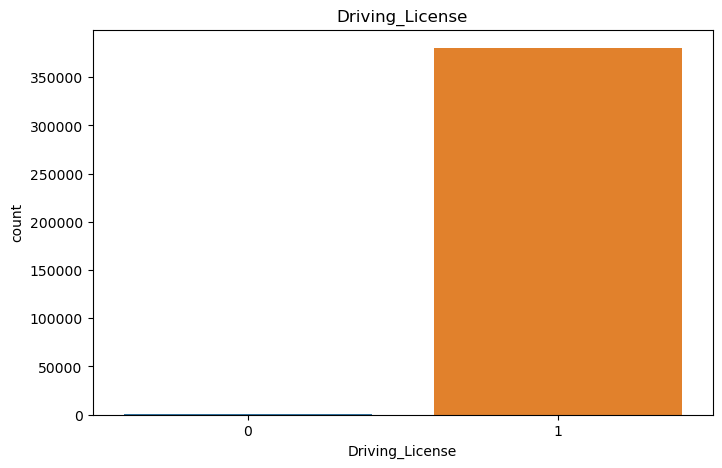

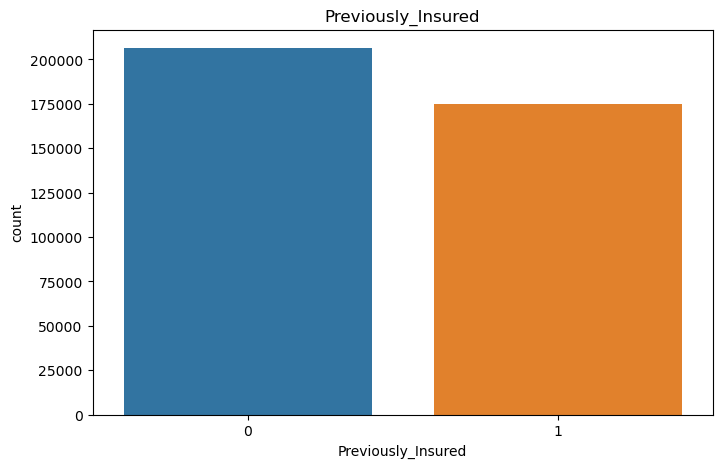

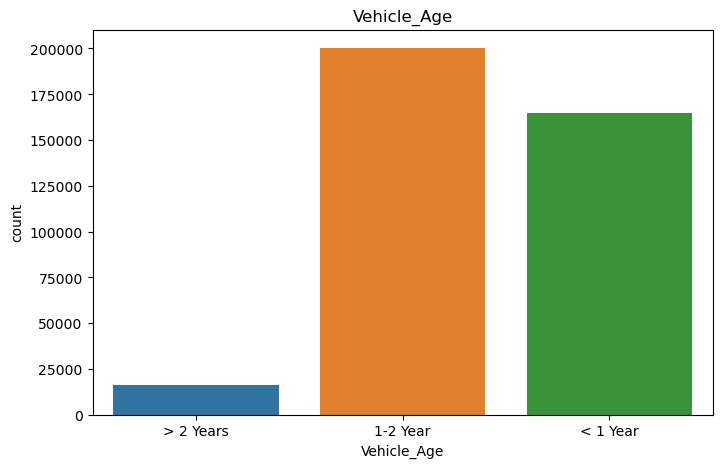

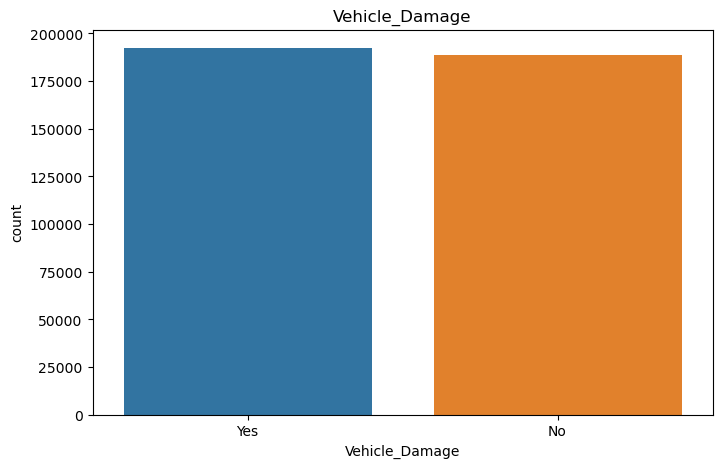

In [170]:
for col in cat_features:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    sns.countplot(x=col, data=df)
    ax.set_title(col)

**Observations**
* In `Gender` column, there is slight different between number of male and female customers in the dataset.
* Almost all of the customers have driving license.
* Number of Customers without previous vehicle insurance is slightly higher than with insurance.
* There is very less number of customers with Vehicle age greater than 2 years.
* Number of customers with and without damaged vehicle are almost equal.

3. **Distplot for Numerical Features:**

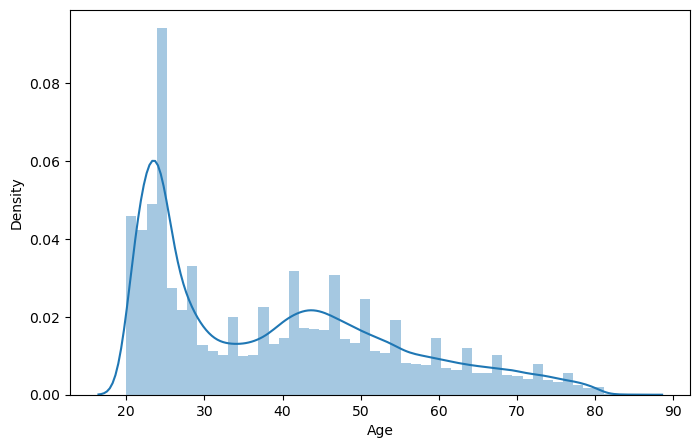

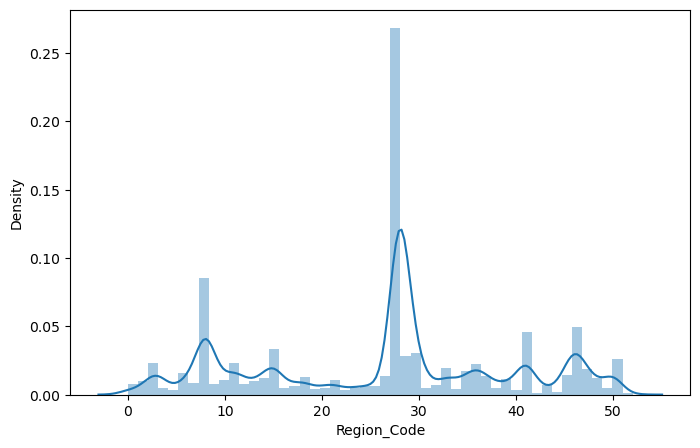

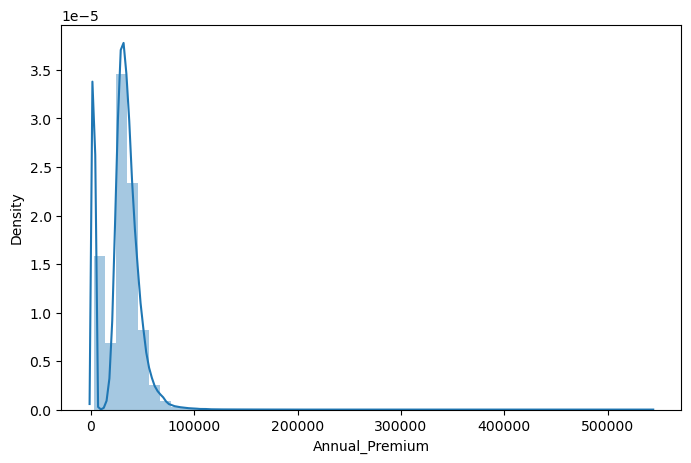

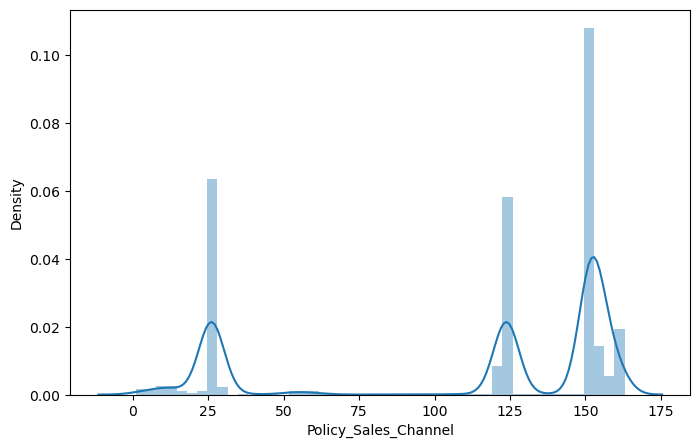

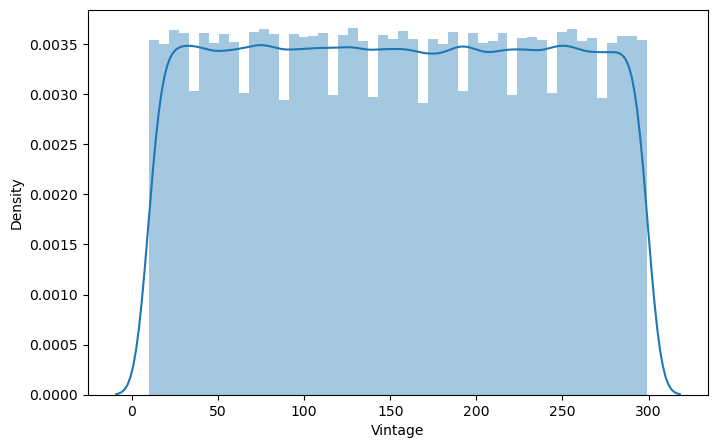

In [171]:
# checking distribution of numeric features

for col in num_features:
  fig = plt.figure(figsize=(8, 5))
  ax = fig.gca()
  sns.distplot(df[col])

**Observations**
* There is large number of customers from age 20 to 30 and then 40 to 50 age group. 
* Annual premium is right skewed and has very long tail, which means there are possible outliers in this column.
* Vintage column has uniform distribution and no inference can be made based on distplot.


4. **Customer percentage in each region code:**

Text(0, 0.5, 'customer percentage')

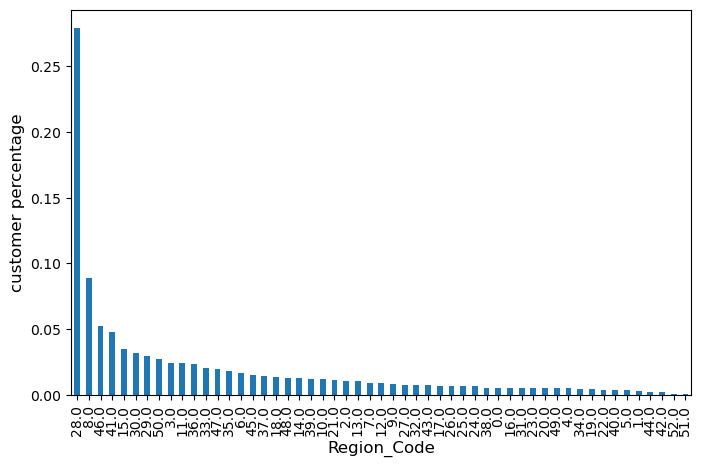

In [172]:
temp_d1 = pd.Series(df.Region_Code.value_counts() / len(df))

temp_d1.sort_values(ascending=False).plot.bar()
plt.xlabel('Region_Code', size=12)
plt.ylabel('customer percentage', size=12)

Most of the customers(30%) are from region code 28 followed by region code 8.

5. **Customer percentage in each Policy Sales Channel:**

Text(0, 0.5, 'Customer percentage')

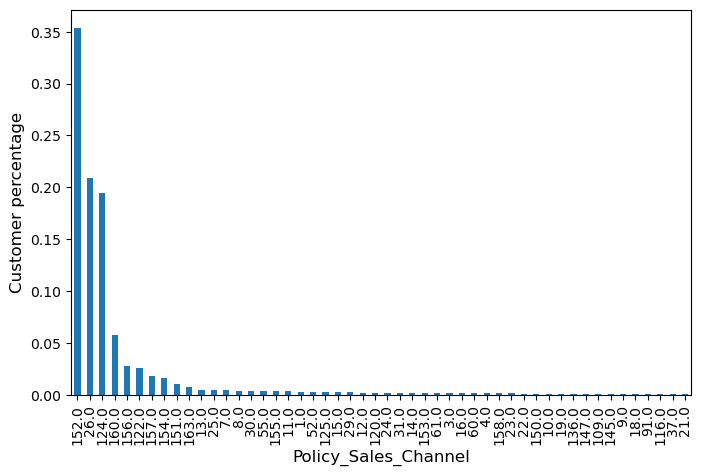

In [173]:
temp_d2 = pd.Series(df.Policy_Sales_Channel.value_counts() / len(df))

temp_d2.sort_values(ascending=False).head(50).plot.bar()
plt.xlabel('Policy_Sales_Channel', size=12)
plt.ylabel('Customer percentage', size=12)

Majority of customers(35%) were connected to the company by sales channel 152, followed by 26 and 124.

## Bivariate

1. **Agewise Annual Premium:**

<AxesSubplot: xlabel='Age', ylabel='Annual_Premium'>

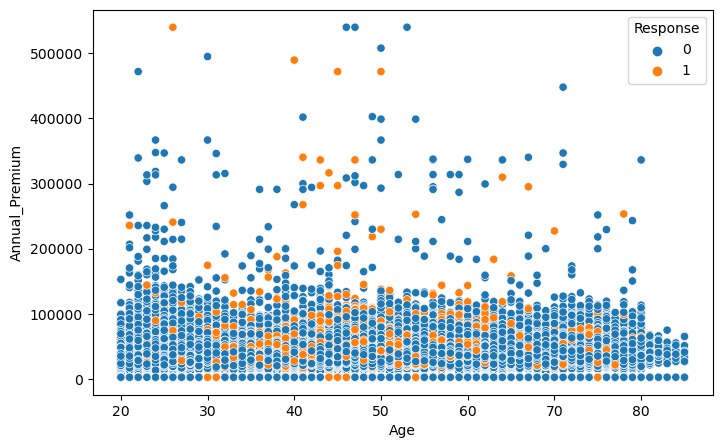

In [174]:
sns.scatterplot(data=df, x="Age", y="Annual_Premium",hue="Response")

* Usually, as age increases annual premium also goes up but that doesn't seem to be the case here.
* There is no significant relation found between age and annual premium, hence our **1st hypothesis** "As age increases the annual premium should also increase" turns out to be **false** here.
*  Response is also random in this case.

2. **Agewise Vehicle Damage:**

<AxesSubplot: xlabel='Age', ylabel='count'>

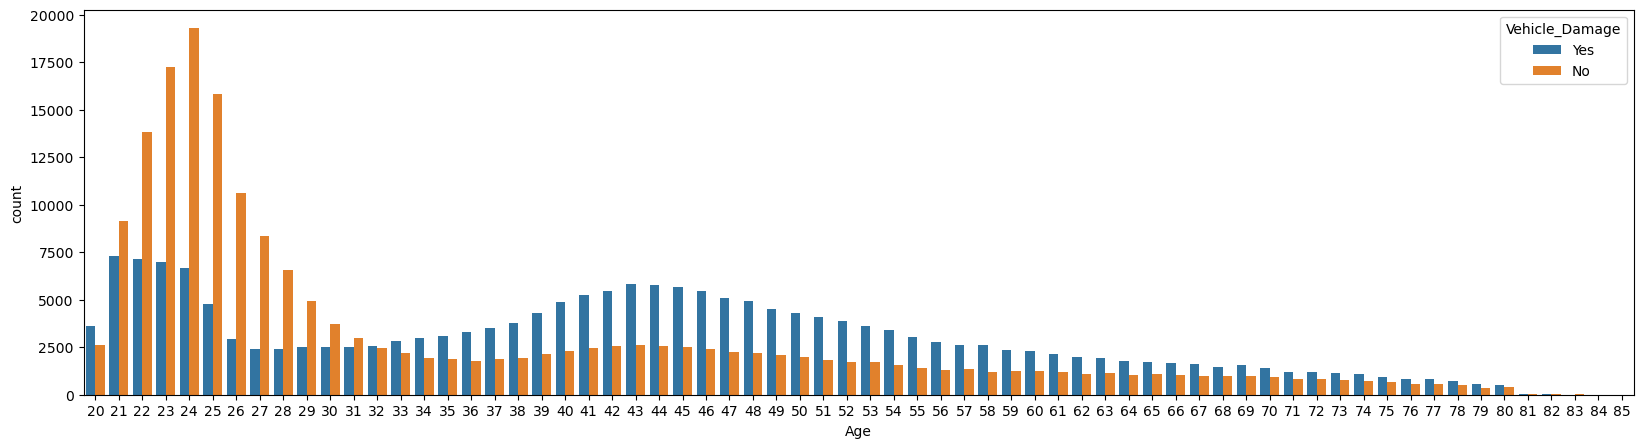

In [175]:
fig = plt.figure(figsize=(20, 5))
ax = fig.gca()
sns.countplot(data=df,x="Age",hue=df.Vehicle_Damage)

The proportion of vehicles that are damaged vs non-damaged is lower in young customers i.e. 20-30 age group but, as age increases the proportion of damaged vehicles is more than non-damaged ones.

3. **Age Distribution for Customers with or without license:**

Text(0.5, 1.0, 'Age distribution for Driving License')

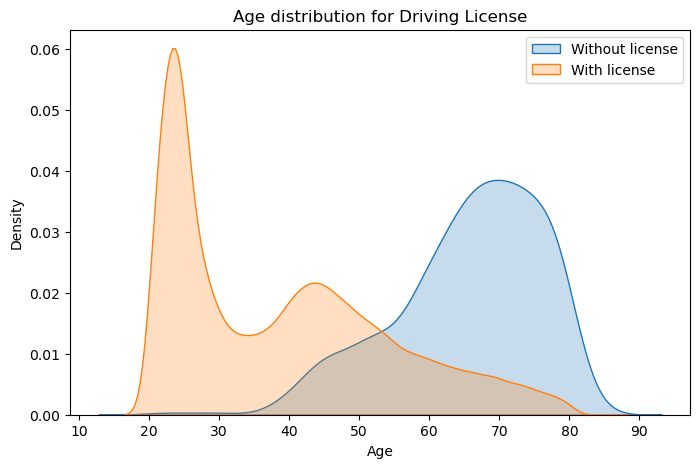

In [176]:
sns.kdeplot(df.loc[df['Driving_License'] == 0].Age, shade = True)
sns.kdeplot(df.loc[df['Driving_License'] == 1].Age, shade = True)
plt.legend(["Without license","With license"])
plt.title('Age distribution for Driving License', fontsize = 12)

Though number of customers without driving license is very low i.e. just 812 customers, above density plot shows most of the customers without license are from age group 50 to 85.  

### Response percentage

In [177]:
# creating a function to get '0' & '1' response percentage for columns

def get_percentage(column, df=df):
    percent_df = (df.groupby([column])['Response'].value_counts(normalize = True)*100).rename('Percentage').reset_index()

    sns.barplot(x=column, y='Percentage', hue='Response', data=percent_df)
    plt.show()
    print('')
    return percent_df

In [178]:
print(cat_features)

['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']


4. **Response percentage plots for Categorical Features:**

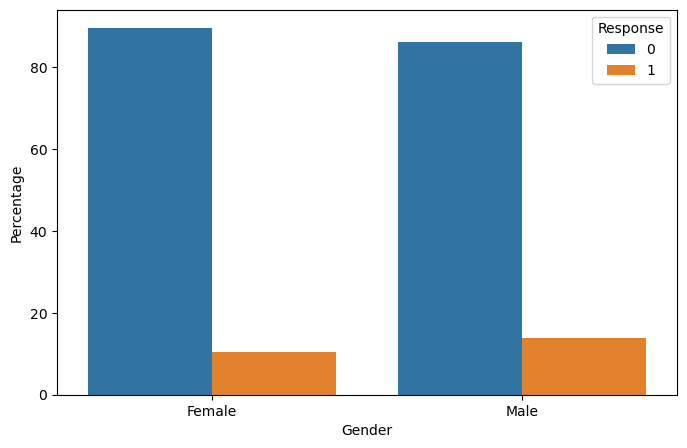


   Gender  Response  Percentage
0  Female         0   89.609759
1  Female         1   10.390241
2    Male         0   86.158893
3    Male         1   13.841107 




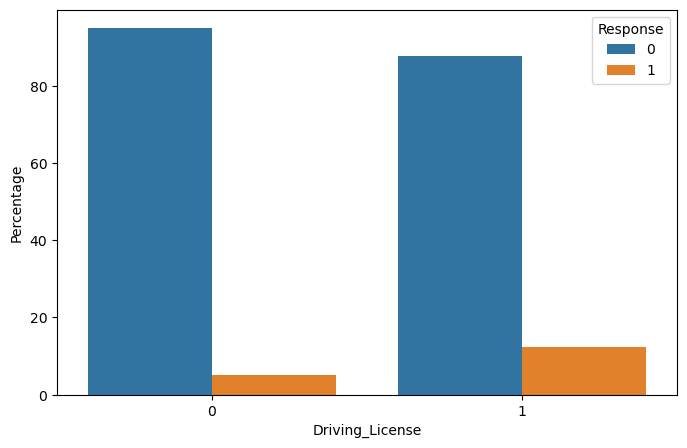


   Driving_License  Response  Percentage
0                0         0   94.950739
1                0         1    5.049261
2                1         0   87.728276
3                1         1   12.271724 




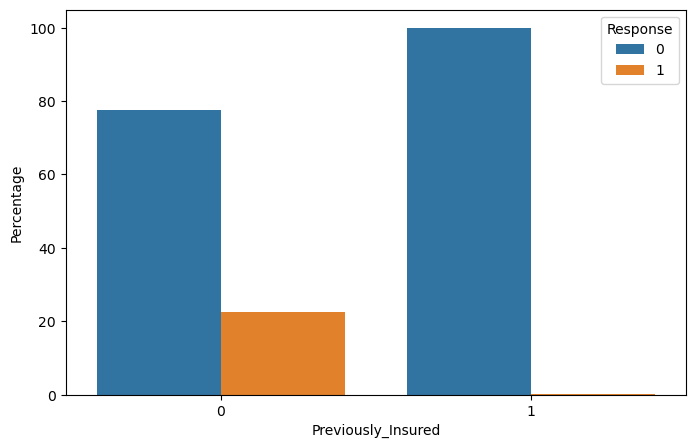


   Previously_Insured  Response  Percentage
0                   0         0   77.454584
1                   0         1   22.545416
2                   1         0   99.909522
3                   1         1    0.090478 




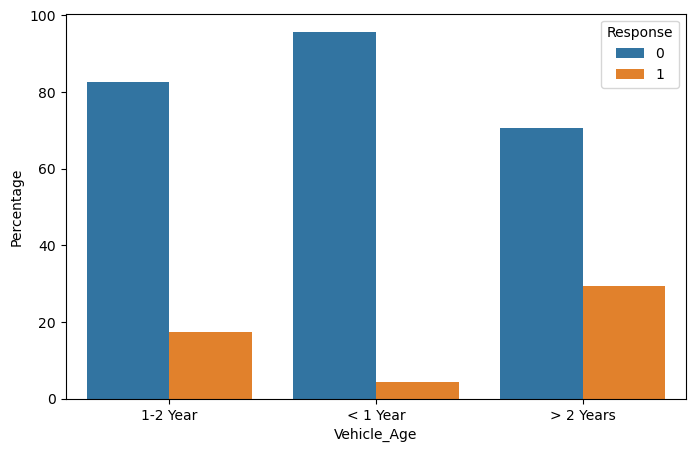


  Vehicle_Age  Response  Percentage
0    1-2 Year         0   82.624453
1    1-2 Year         1   17.375547
2    < 1 Year         0   95.629483
3    < 1 Year         1    4.370517
4   > 2 Years         0   70.625351
5   > 2 Years         1   29.374649 




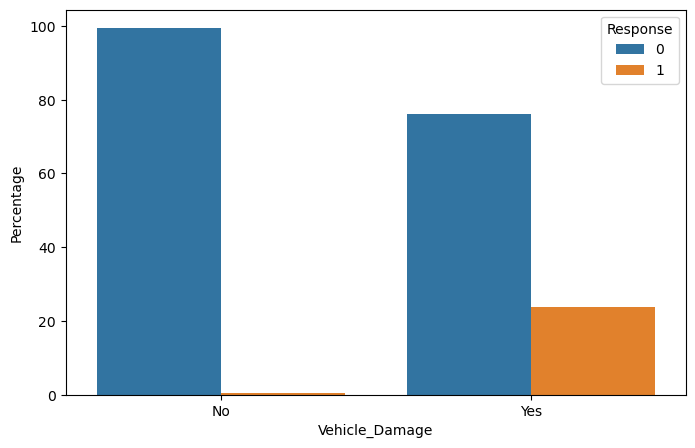


  Vehicle_Damage  Response  Percentage
0             No         0   99.479586
1             No         1    0.520414
2            Yes         0   76.234454
3            Yes         1   23.765546 




In [179]:
# for categorical variables checking '0' & '1' response percentage

for col in cat_features:
    print(get_percentage(col), '\n', '='*75, '\n\n')

**Inferences**
* Positive response in male category is almost 14% than that of female category which is 10%. This means males are 30% more likely to respond as yes than females.
* As we saw earlier majority of customers have driving license and from the percentage plot above we can say that, customers who have driving license are more likely to respond as yes, comparatively.
* Out of customers who don't have previous insurance, 22% of them responded positively. Whereas customers with previous vehicle insurance are obviosly not interested in buying another one. This also makes our **2nd hypothesis true**.
* There is very less number of customers with vehicle age >2 years but almost 30% of times they are likely to buy an insurance. For vehicle age 1-2 years 17% respond positively.
* We hypothesized correctly! Customers with vehicle age <1 year are least interested in insurance, 95% of times they respond negatively. Hence our **3rd hypothesis** turns out to be **true**.
* Customers who damaged their vehicles in past, almost 24% of times they respond as Yes for vehicle insurance. And customers without vehicle damage, almost all of the times they respond as No. With that our **4th hypothesis** is also **true**.

In [180]:
df1 = df.copy()

In [181]:
df1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [182]:
# creating a function to divide values in Annual_Premium column into categories

def Premium_bin(x):
    if (x >= 100) & (x < 25000):
        return 'Low'
    elif (x >= 25000) & (x < 50000):
        return 'Medium'
    elif (x >= 50000) & (x < 100000):
        return 'High'
    else:
        return 'Expensive'

In [183]:
# adding 'Premium_categories' column to the Insurance_df1 

df1['Premium_categories'] = df1['Annual_Premium'].apply(Premium_bin)

In [184]:
# creating a function to divide values in Vintage column into categories

def Vintage_bin(x):
    if (x >= 0) & (x < 100):
        return 'Vintage_bin_1'
    elif (x >= 100) & (x < 200):
        return 'Vintage_bin_2'
    elif (x >= 200) & (x < 300):
        return 'Vintage_bin_3'
    else:
        return 'Vintage_bin_4'

In [185]:
# Adding 'Vintage_bins' column to the Insurance_df1

df1['Vintage_bins'] = df1['Vintage'].apply(Vintage_bin)

In [186]:
# creating a function to divide values in Age column into categories

def Age_bin(x):
    if (x >= 18) & (x < 31):
        return '18-30'
    elif (x >= 31) & (x < 46):
        return '31-45'
    elif (x >= 46) & (x < 61):
        return '46-60'
    else:
        return '60 above'

In [187]:
# Adding 'Age_groups' column to the Insurance_df1

df1['Age_groups'] = df['Age'].apply(Age_bin)

In [188]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Premium_categories,Vintage_bins,Age_groups
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Medium,Vintage_bin_3,31-45
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Medium,Vintage_bin_2,60 above
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Medium,Vintage_bin_1,46-60
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Medium,Vintage_bin_3,18-30
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Medium,Vintage_bin_1,18-30


In [189]:
df1.Premium_categories.value_counts() 

Medium       247946
Low          100954
High          31431
Expensive       778
Name: Premium_categories, dtype: int64

In [190]:
df1.Vintage_bins.value_counts()

Vintage_bin_2    131542
Vintage_bin_3    131078
Vintage_bin_1    118489
Name: Vintage_bins, dtype: int64

In [191]:
df1.Age_groups.value_counts()

18-30       161461
31-45        95883
46-60        80526
60 above     43239
Name: Age_groups, dtype: int64

5. **Response percentage plots for Premium Categories column:**

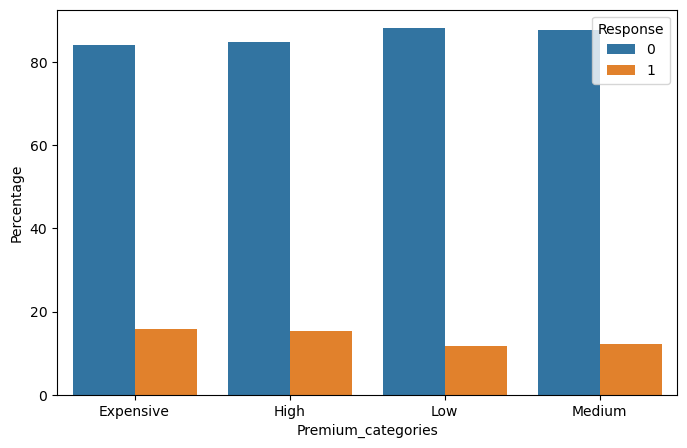

,Premium_categories,Response,Percentage
0,Expensive,0,84.190231
1,Expensive,1,15.809769
2,High,0,84.804811
3,High,1,15.195189
4,Low,0,88.290707
5,Low,1,11.709293
6,Medium,0,87.904624
7,Medium,1,12.095376


In [192]:
get_percentage('Premium_categories', df1)

```
Premium categories:
Low          100 - 25000
Medium       25000 - 50000
High         50000 - 100000
Expensive    100000 above
```

Premium categories 'Expensive' and 'High' have slightly high positive response rate, but there is no significant different in response across all of the premium categories.

6. **Response percentage plots for Vintage bins column:**

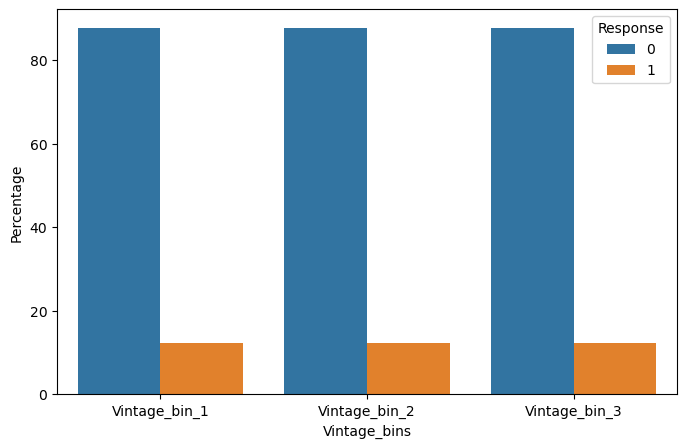

,Vintage_bins,Response,Percentage
0,Vintage_bin_1,0,87.755825
1,Vintage_bin_1,1,12.244175
2,Vintage_bin_2,0,87.731675
3,Vintage_bin_2,1,12.268325
4,Vintage_bin_3,0,87.744702
5,Vintage_bin_3,1,12.255298


In [193]:
get_percentage('Vintage_bins', df1)

We divided vintage column into 3 bins with 100 days interval. As we can see in above plot there is no difference in response rate based on number of days customer associated with company. This makes our **5th hypothesis** "Longer the customer is associated with company, they are more likely to respond as yes" **false**.

7. **Response percentage plots for Age_groups column:**

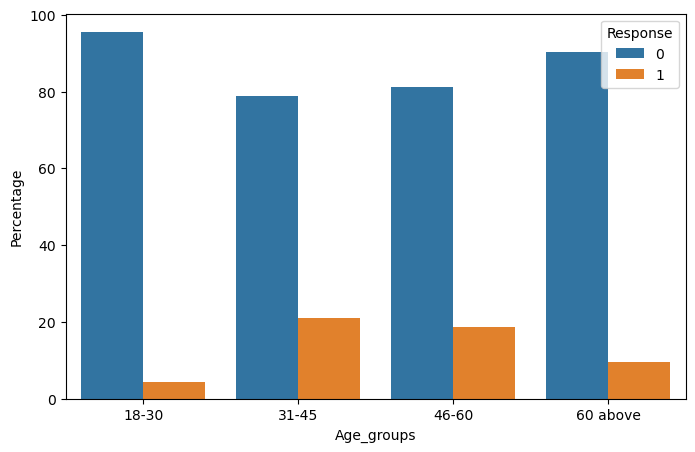

,Age_groups,Response,Percentage
0,18-30,0,95.551248
1,18-30,1,4.448752
2,31-45,0,78.876339
3,31-45,1,21.123661
4,46-60,0,81.268162
5,46-60,1,18.731838
6,60 above,0,90.311987
7,60 above,1,9.688013


In [194]:
get_percentage('Age_groups', df1)

* We can see that customers in the age group 31 to 45 and 46 to 60 have very high postive response rate compare to other two categories. 
* We also know from earlier graph(*Coutplot for age based on vehicle damage*) that customers in these age groups have high vehicle damage rate and also, people with damaged vehicles are more likely to buy a vehicle insurance.

# Feature engineering

In [195]:
df.Gender = df.Gender.replace({'Male':1,'Female':0})

In [196]:
df.Vehicle_Damage = df.Vehicle_Damage.replace({'Yes': 1,  'No': 0})

In [197]:
df.Vehicle_Age = df.Vehicle_Age.replace({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

<AxesSubplot: >

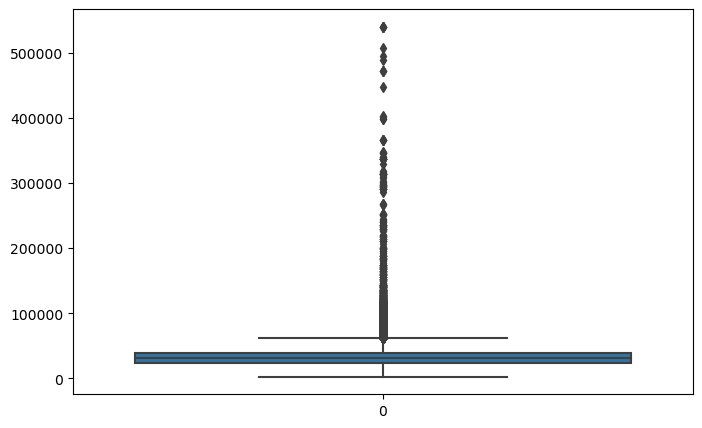

In [198]:
sns.boxplot(df.Annual_Premium)

We can see there are large number of outliers in the annual premium column.

In [199]:
# Finding IQR, upper limit(upper whisker) and lower limit(lower whisker) for Annual premium column

IQR = df.Annual_Premium.quantile(.75) - df.Annual_Premium.quantile(.25)

lower_limit = df.Annual_Premium.quantile(.25) - IQR * 1.5
upper_limit = df.Annual_Premium.quantile(.75) + IQR * 1.5

print(f'Lower limit for Annual premium is {lower_limit}')
print(f'Upper limit for Annual premium is {upper_limit}')

Lower limit for Annual premium is 1912.5
Upper limit for Annual premium is 61892.5


Minimum annual premium is 2630 which is above the lower limit 1912.2, hence there are no values in annual premium below lower whisker.

In [200]:
# Checking total number of outliers

len(df[df['Annual_Premium'] > upper_limit])

10320

Compared to total number of rows we have in dataset, there are very few values with outliers in the annual premium.

In [201]:
# replacing outliers in Annual premium with upper limit

df.loc[(df['Annual_Premium'] > upper_limit), 'Annual_Premium'] = upper_limit

Instead of removing, we replaced those outliers with the upper limit calculated by using IQR method.

## Handling Categorical values in Region_Code and Policy_Sales_Channel

* Target encoding is the process of replacing a categorical value with the mean of the target variable. 
* This technique is useful here because it gives higher weightage to the categories that can explain the target.

In [202]:
# Applying target mean encoding on Region_Code column

Mean_encoding_Region_Code = df.groupby('Region_Code')['Response'].mean().to_dict()

df['Region_Code_encoded'] =  df['Region_Code'].map(Mean_encoding_Region_Code)

In [203]:
# Applying target mean encoding on Policy_Sales_Channel column

Mean_encoding_Policy_Sales_Channel = df.groupby('Policy_Sales_Channel')['Response'].mean().to_dict()

df['Policy_Sales_Channel_encoded'] =  df['Policy_Sales_Channel'].map(Mean_encoding_Policy_Sales_Channel)

In [204]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Region_Code_encoded,Policy_Sales_Channel_encoded
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,0.187163,0.199385
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0,0.127662,0.199385
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,0.187163,0.199385
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0,0.112760,0.028624
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0,0.121776,0.028624


In [205]:
df = df.drop(columns=['id', 'Region_Code', 'Policy_Sales_Channel'])

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Gender                        381109 non-null  int64  
 1   Age                           381109 non-null  int64  
 2   Driving_License               381109 non-null  int64  
 3   Previously_Insured            381109 non-null  int64  
 4   Vehicle_Age                   381109 non-null  int64  
 5   Vehicle_Damage                381109 non-null  int64  
 6   Annual_Premium                381109 non-null  float64
 7   Vintage                       381109 non-null  int64  
 8   Response                      381109 non-null  int64  
 9   Region_Code_encoded           381109 non-null  float64
 10  Policy_Sales_Channel_encoded  381109 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


This final dataset has 10 features in total with Response as target variable.

1. Correlation Heatmap:

<AxesSubplot: >

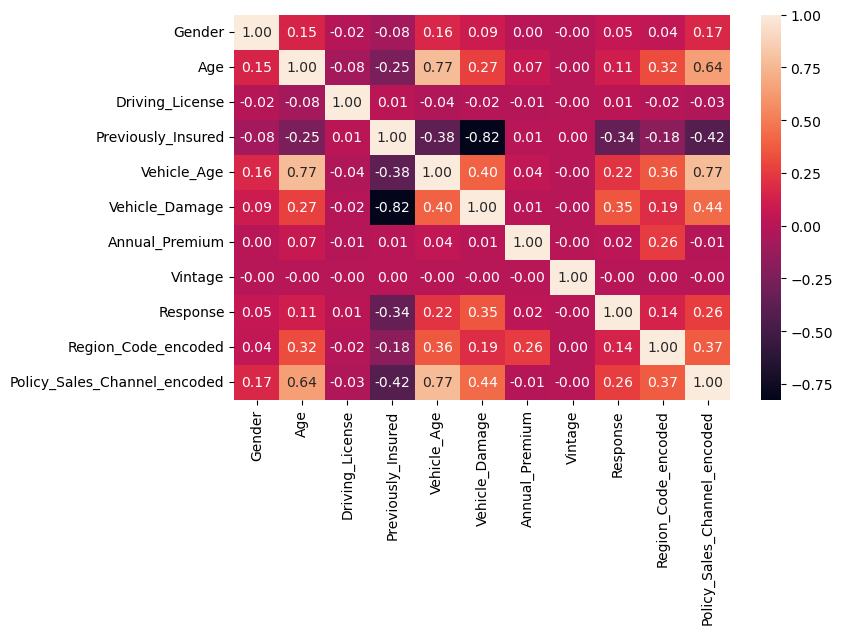

In [207]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

* Target column Response has no direct correlation with any of the features.

# Modeling

## Train test split and SMOTE

In [208]:
X = df.drop('Response',axis=1)
y = df.Response

In [209]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [211]:
# creating an instance of SMOTE
smote = SMOTE(random_state = 42)

In [212]:
# applying smote on training data
X_train, y_train = smote.fit_resample(X_train, y_train)

* SMOTE (Synthetic Minority Oversampling Technique) is used in the above data set to balance out the highly skewed proportions of 1s and 0s. Proportion for 1s was just 12% in our dataset, hence we have up-sampled the # of 1s in order to achieve a balanced dataset on which classification can be performed.
* Note: we use SMOTE for training the model only and based on that we try making predictions on original test data.

## Performance Metrics

In [213]:
# creating a function to get confusion matrix, classification report and roc-auc curve for the applied model
 
def get_classifier_analytics(model, X_train , X_test, y_train, y_train_pred, y_test, y_test_pred):

  print('Confusion Matrix for Train :')
  ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
  plt.show()
  print()
  print('Confusion Matrix for Test :')
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.show()
  print()
  print('='*75)
  print()
  print('Training Classification Report :')
  
  print(classification_report(y_train, y_train_pred))
  print()
  print('Testing Classification Report :')

  print(classification_report(y_test, y_test_pred))
  print()
  print('='*75)
  print()
  print('ROC_AUC Curve :')
  print()
  ax = plt.gca()
  plot_roc_curve(model, X_train, y_train, ax=ax, name = 'Train-ROC')
  plot_roc_curve(model, X_test, y_test, ax=ax, name = 'Test-ROC')
  plt.plot([0,1],[0,1], linestyle = '--')

In [214]:
#Creating a function to get evaluation metrics dataframe

def evaluation(model, y_train, y_train_pred, y_test, y_test_pred):

    train_accuracy = accuracy_score(y_train,y_train_pred)
    test_accuracy = accuracy_score(y_test,y_test_pred)

    train_precision_score = precision_score(y_train,y_train_pred)
    test_precision_score = precision_score(y_test,y_test_pred)
  
    train_recall_score = recall_score(y_train,y_train_pred)
    test_recall_score = recall_score(y_test,y_test_pred)
  
    train_f1_score = f1_score(y_train,y_train_pred)
    test_f1_score = f1_score(y_test,y_test_pred)
  
    return pd.DataFrame({'Model Name': model,
                       'Train accuracy': train_accuracy, 'Test accuracy': test_accuracy,
                       'Train precision': train_precision_score, 'Test precision': test_precision_score,
                       'Train recall': train_recall_score, 'Test recall': test_recall_score,
                       'Train f1 score': train_f1_score, 'Test f1 score': test_f1_score
                       }, index = [0])

We created functions here to get evaluation metrics for the following models we experimented.

**Confusion matrix**
* **Precision** is a good metric to use when the costs of **false positive(FP)** is high.

  **Precision = TP / (TP + FP)**

* **Recall** is a good metric to use when the cost associated with **false negative(FN)** is high.

  **Recall = TP / (TP + FN)**

* **F1-score** is a weighted average of **precision** and **recall**. Thus, it considers **FP** and **FN.** This metric is very useful when we have uneven class distribution, as it seeks a balance between **precision** and **recall.**

  **F1-score = 2 * (precision * recall) / (precision + recall)**

* In this imbalance dataset accuracy isn't a good evaluation measure.
* In confusion matrix, we have to focus more on Recall than Precision. That means we want to increase our True positives(TP) and reduce False neagtives(FN). 
* We dont want to miss out on customers who have actually responed as Yes for vehicle insurance.

**ROC-AUC**

**An ROC curve** (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate

* False Positive Rate

True Positive Rate (TPR) is a synonym for recall and False Positive Rate (FPR) is defined as **FPR = (FP) / (FP+TN)**

**AUC** stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve.
* AUC represents the measure of separability, which tells how much the classification model is capable of distinguishing between classes. Generally, higher the AUC, the better the model at predicting 1s as 1s and 0s as 0s.

## Logistic Regression with hyperparameter tuning

In [215]:
 lr = LogisticRegression(random_state = 42)

param_dict_lr = {'C': [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10]}

In [216]:
lr_grid = GridSearchCV(estimator=lr,
                       param_grid = param_dict_lr,
                       cv = 5, verbose=2, scoring='f1')

In [217]:
lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ............................................C=1e-06; total time=   0.2s
[CV] END ............................................C=1e-06; total time=   0.2s
[CV] END ............................................C=1e-06; total time=   0.2s
[CV] END ............................................C=1e-06; total time=   0.2s
[CV] END ............................................C=1e-06; total time=   0.2s
[CV] END ............................................C=1e-05; total time=   0.2s
[CV] END ............................................C=1e-05; total time=   0.2s
[CV] END ............................................C=1e-05; total time=   0.2s
[CV] END ............................................C=1e-05; total time=   0.2s
[CV] END ............................................C=1e-05; total time=   0.2s
[CV] END ...........................................C=0.0001; total time=   0.2s
[CV] END ........................................

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='f1', verbose=2)

In [218]:
# checking the best parameters
lr_grid.best_params_

{'C': 0.01}

In [219]:
# predicting the target variable(Response) on train and test data
y_train_pred_lr_grid = lr_grid.predict(X_train)
y_test_pred_lr_grid = lr_grid.predict(X_test)

Confusion Matrix for Train :


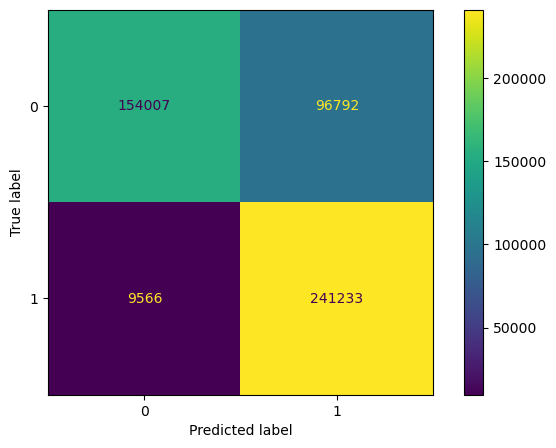


Confusion Matrix for Test :


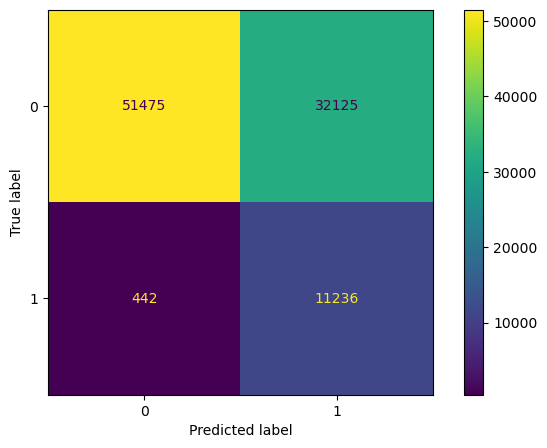



Training Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.61      0.74    250799
           1       0.71      0.96      0.82    250799

    accuracy                           0.79    501598
   macro avg       0.83      0.79      0.78    501598
weighted avg       0.83      0.79      0.78    501598


Testing Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     83600
           1       0.26      0.96      0.41     11678

    accuracy                           0.66     95278
   macro avg       0.63      0.79      0.58     95278
weighted avg       0.90      0.66      0.72     95278



ROC_AUC Curve :



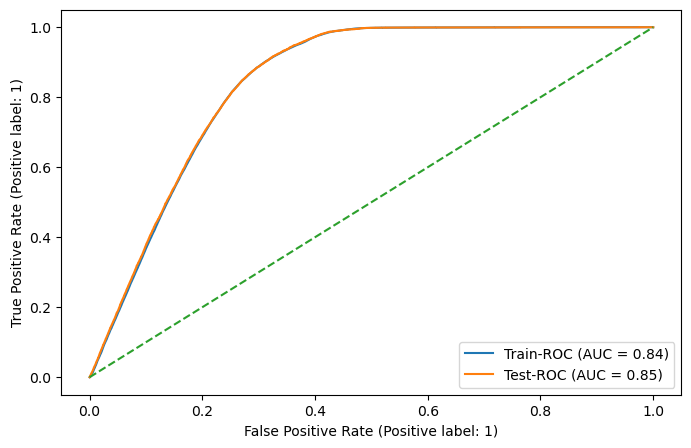

In [220]:
# Applying get_classifier_analytics function to get confusion matrix, classification report and roc-auc curve
 
get_classifier_analytics(lr_grid, X_train , X_test, y_train, y_train_pred_lr_grid, y_test, y_test_pred_lr_grid)

* We can see that Logistic regression performing poorly on training and testing data.
* There is huge difference between recall and precision values for 0s and 1s in both training and test data.
* On test data it shows very high recall for 1s but its at the cost of recall for 0s.

In [221]:
# creating evaluation metrics dataframe for logistic regression
lr_metrics = evaluation('LogisticRegression HP_tuning', y_train, y_train_pred_lr_grid, y_test, y_test_pred_lr_grid)
lr_metrics

,Model Name,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score
0,LogisticRegression HP_tuning,0.787962,0.65819,0.713654,0.259127,0.961858,0.962151,0.819372,0.408292


## Random Forest

In [222]:
rf = RandomForestClassifier()

In [223]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [224]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

Confusion Matrix for Train :


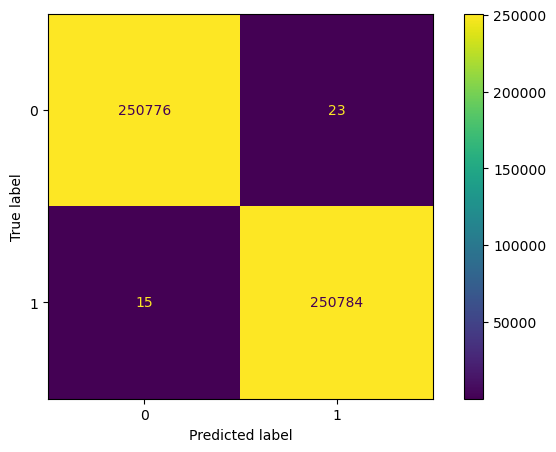


Confusion Matrix for Test :


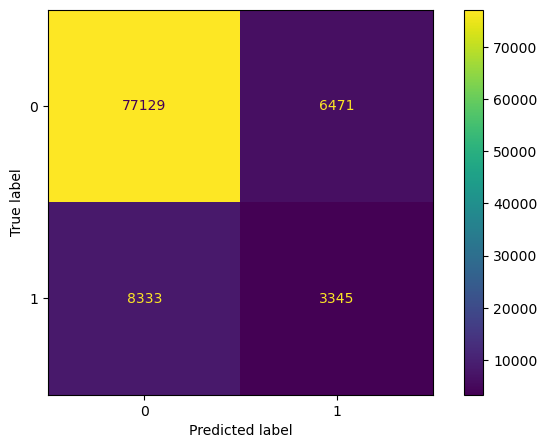



Training Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    250799
           1       1.00      1.00      1.00    250799

    accuracy                           1.00    501598
   macro avg       1.00      1.00      1.00    501598
weighted avg       1.00      1.00      1.00    501598


Testing Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     83600
           1       0.34      0.29      0.31     11678

    accuracy                           0.84     95278
   macro avg       0.62      0.60      0.61     95278
weighted avg       0.83      0.84      0.84     95278



ROC_AUC Curve :



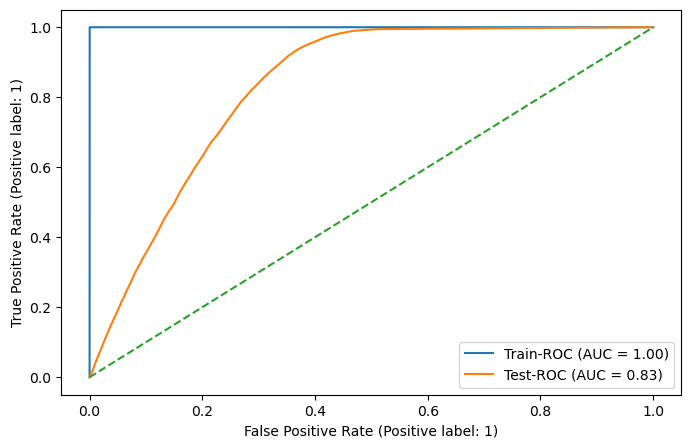

In [225]:
# Applying get_classifier_analytics function to get confusion matrix, classification report and roc-auc curve

get_classifier_analytics(rf, X_train , X_test, y_train, y_train_pred_rf, y_test, y_test_pred_rf)

* Random forest performs exceptionally well on training data but very poorply on test data.
* It predicts very well for 0s but as we can see recall, precision, f1 scores for 1s are very low.
* It is a clear case of overfitting.


In [226]:
rf_metrics = evaluation('RandomForestClassifier', y_train, y_train_pred_rf, y_test, y_test_pred_rf)
rf_metrics

,Model Name,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score
0,RandomForestClassifier,0.999924,0.844623,0.999908,0.34077,0.99994,0.286436,0.999924,0.31125


### RandomForest with hyperparameter tuning

In [117]:
rf = RandomForestClassifier()

param_dict_rf = {
    'max_depth': [8, 9, 10],
    'min_samples_leaf': [4,6,8],
    'min_samples_split': [5,8,10],
    'n_estimators': [300]
    }

In [118]:
rf_rand = RandomizedSearchCV(estimator=rf, param_distributions=param_dict_rf, cv=4,verbose=2, 
                             scoring='f1', random_state=42, n_jobs=-1)

In [119]:
rf_rand.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [8, 9, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 8, 10],
                                        'n_estimators': [300]},
                   random_state=42, scoring='f1', verbose=2)

In [120]:
rf_rand.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_depth': 10}

In [121]:
rf_rand_best = rf_rand.best_estimator_
rf_rand_best

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=300)

In [122]:
y_train_pred_rf_rand = rf_rand.predict(X_train)
y_test_pred_rf_rand = rf_rand.predict(X_test)

Confusion Matrix for Train :


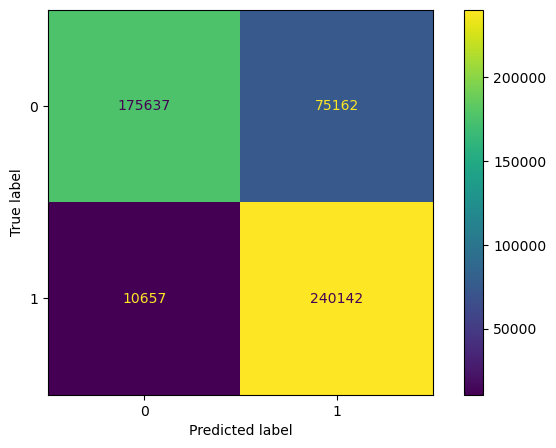


Confusion Matrix for Test :


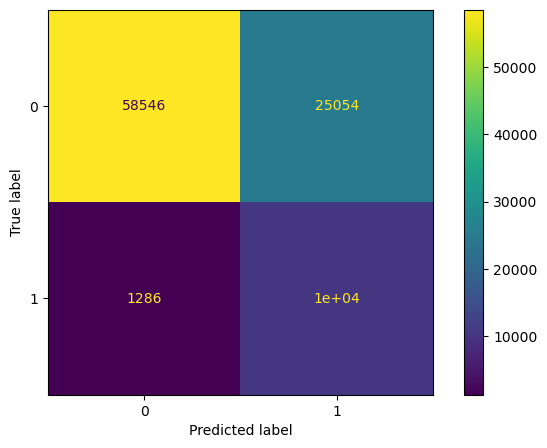



Training Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.70      0.80    250799
           1       0.76      0.96      0.85    250799

    accuracy                           0.83    501598
   macro avg       0.85      0.83      0.83    501598
weighted avg       0.85      0.83      0.83    501598


Testing Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     83600
           1       0.29      0.89      0.44     11678

    accuracy                           0.72     95278
   macro avg       0.64      0.80      0.63     95278
weighted avg       0.89      0.72      0.77     95278



ROC_AUC Curve :



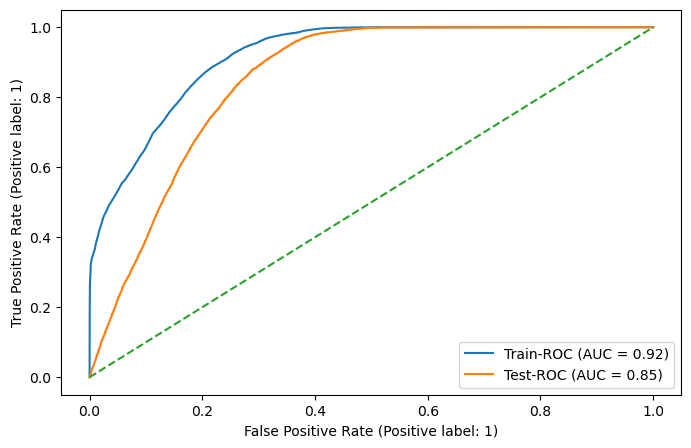

In [123]:
# Applying get_classifier_analytics function to get confusion matrix, classification report and roc-auc curve

get_classifier_analytics(rf_rand, X_train , X_test, y_train, y_train_pred_rf_rand, y_test, y_test_pred_rf_rand)

* Random forest after hyperparameter tuning performs very well on training data.
* In test data we weren't able to maintain the high precision for 1 but recall, which is most important parameter in this cross sell prediction is quite higher along with the 70% recall for 0.
* f1 score for 0s is very good but for 1s its dropping to 44% becasue of the low precision value.

In [124]:
# creating evaluation metrics dataframe for random forest after hyperparameter tuning
rf_rand_metrics = evaluation('RandomForestClassifier HP_tuning', y_train, y_train_pred_rf_rand, y_test, y_test_pred_rf_rand)
rf_rand_metrics

,Model Name,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score
0,RandomForestClassifier HP_tuning,0.828909,0.723546,0.761621,0.293178,0.957508,0.889878,0.848404,0.441049


In [125]:
# Initializing features, importances and indices values

features = Insurance_df.drop('Response',axis=1).columns
importances = rf_rand.best_estimator_.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

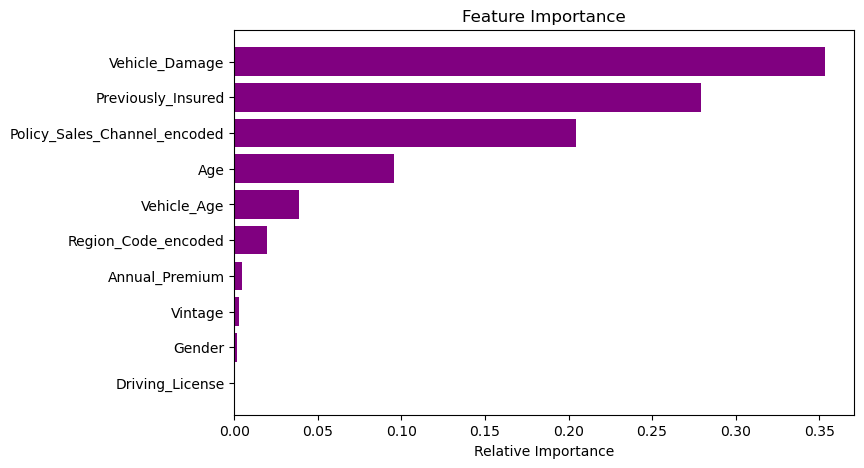

In [127]:
# Plotting feature importance

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

* As we can see, Vehicle damage, previously insured, policy sales channel, age etc. are the most important features for predicting the response.
* And driving license, gender, vintage have no significant impact on the prediction.

## XGBoost

Now we know the most important features, so let's try XGBoost model after eliminating unimportant features, i.e. 'Vintage', 'Gender', 'Driving_License'.

In [227]:
X = df.drop(['Response', 'Vintage', 'Gender', 'Driving_License'],axis=1)
y = df.Response

In [228]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [230]:
smote = SMOTE(random_state = 42)

In [231]:
X_train, y_train = smote.fit_resample(X_train, y_train)

### XGB with optimized parameters

**NOTE:** We tried wide range of hyperparameters for XGBoost with different set of combinations.



After doing multiple iterations on the combination of above parameters, we finally came up with following simple parameters which actually gave us comparatively better results.

In [232]:
# creating an instance of XGBClassifier and defining the parameter dictionary

xgb = XGBClassifier()

param_dict_xgb = {'max_depth': [10], 'n_estimators': [800], 'learning_rate': [1e-5]}

* A problem with gradient boosted decision trees is that they are quick to learn and overfit training data.
* One effective way to slow down learning in the gradient boosting model is to use a "learning rate".
* After each boosting step, we can directly get the weights of new features, and learning rate shrinks the feature weights to make the boosting process more conservative.
* Therefore using such a low learning_rate gave us the good results in this case.


In [233]:
# Using GridSearchCV for trying parameters dictionary on model

XGB_grid = GridSearchCV(estimator=xgb,
                       param_grid = param_dict_xgb,
                       cv = 4, verbose=2, scoring='f1', n_jobs=-1)

In [234]:
# fitting training data to XGBClassifier

XGB_grid.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [235]:
# predicting the target variable(Response) on train and test data

y_train_pred_XGB_grid = XGB_grid.predict(X_train)
y_test_pred_XGB_grid = XGB_grid.predict(X_test)

Confusion Matrix for Train :


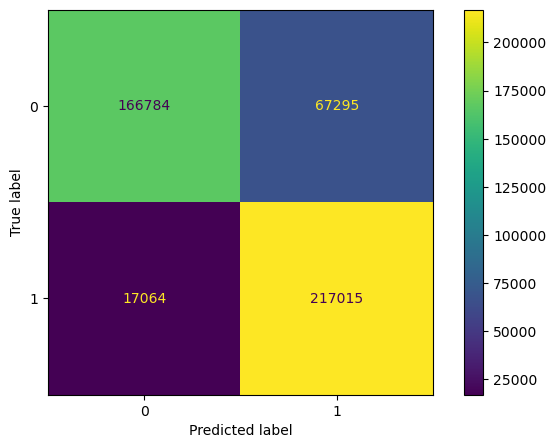


Confusion Matrix for Test :


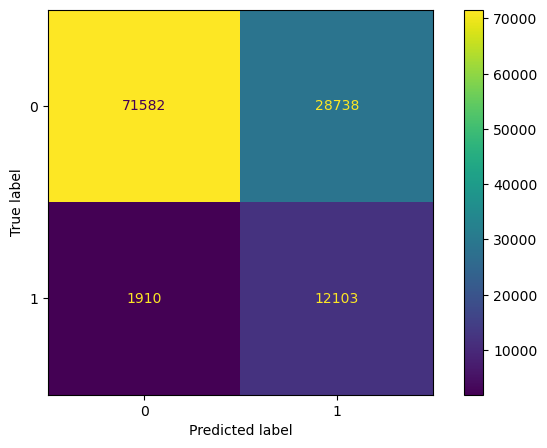



Training Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.71      0.80    234079
           1       0.76      0.93      0.84    234079

    accuracy                           0.82    468158
   macro avg       0.84      0.82      0.82    468158
weighted avg       0.84      0.82      0.82    468158


Testing Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.71      0.82    100320
           1       0.30      0.86      0.44     14013

    accuracy                           0.73    114333
   macro avg       0.64      0.79      0.63    114333
weighted avg       0.89      0.73      0.78    114333



ROC_AUC Curve :



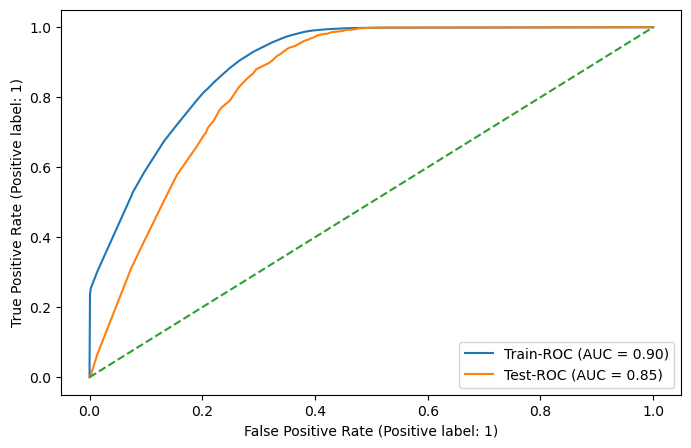

In [236]:
# Applying get_classifier_analytics function to get confusion matrix, classification report and roc-auc curve

get_classifier_analytics(XGB_grid, X_train , X_test, y_train, y_train_pred_XGB_grid, y_test, y_test_pred_XGB_grid)

* We can see that XGBoost after tuning doesn't overfit on training data.
* Recall for 1 is 86% on test data and for 0 its 71%, which is not perfect but better recall combination for 0s and 1s.
* Overall, XGBoost performs well compared to logistic regression and there is no huge difference between metric values for Random forest and XGBoost after hyperparameter tuning.

In [237]:
# creating evaluation metrics dataframe for XGBoost classifier

XGB_grid_metrics = evaluation('XGBClassifier HP_tuning', y_train, y_train_pred_XGB_grid, y_test, y_test_pred_XGB_grid)
XGB_grid_metrics

,Model Name,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score
0,XGBClassifier HP_tuning,0.819807,0.731941,0.763304,0.296344,0.927102,0.863698,0.837267,0.44128


## Metrics of Models used

In [238]:
# Concatinating all the model metrics dataframe to get final model metrics

metrics_df = pd.concat([lr_metrics,rf_metrics,rf_rand_metrics,XGB_grid_metrics], ignore_index = True)

In [239]:
metrics_df

,Model Name,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score
0,LogisticRegression HP_tuning,0.787962,0.658190,0.713654,0.259127,0.961858,0.962151,0.819372,0.408292
1,RandomForestClassifier,0.999924,0.844623,0.999908,0.340770,0.999940,0.286436,0.999924,0.311250
2,RandomForestClassifier HP_tuning,0.828909,0.723546,0.761621,0.293178,0.957508,0.889878,0.848404,0.441049
3,XGBClassifier HP_tuning,0.819807,0.731941,0.763304,0.296344,0.927102,0.863698,0.837267,0.441280


* Logistic regression has highest recall for test data. So, if the organization needs a very high recall rate i.e. lowest False Negatives then they may use logistic regression with 'C' value '0.01'.
* But in real life scenario, we think Random forest and XGBoost would perform better with highest f1 score of 44% and their test recall is also very high.

# **Conclusions**

The aim of this project was to predict whether customer would be interested in buying a Vehicle insurance or not.

Following insights came out:

* 87.7% customers responded as No for buying a vehicle insurance. It clearly shows that most of the customers are not interested in buying a vehicle insurance.
* Males are 30% more likely to respond as yes for vehicle insurance than females. So company could focus more on targeting male customers and do more promotions targeted towards the female customers.
* Most of the customers have driving license and out of them 12% are likely to respond as yes for vehicle insurance.
* There is no point in reaching out to customers who already have vehicle insurance as almost all of them responded negatively for buying another insurance.
* 22% of customers responded positively who don't have previous insurance. So, company should focus more such customers as conversion possibility is higher is such cases.
* Company should focus on customers whose vehicle is more than 2 years old, as 30% of times they are interested in buying an insurance, which is huge compared to other features.
* Customers with vehicle age less than an year are least interested in insurance as while buying the vehicle people often buy 1 year insurance. Company shouldn't spend more time on these customers as just 4% of times they are likely to say Yes for a vehicle insurance.
* Customers who damaged their vehicles in past are more sensitive towards buying a vehicle insurance. Infact 24% of times they responded positively based on this dataset.
* Customers who haven't damaged their vehicle in past, almost all of the times they respond as No for insurance. In order to increase the customer base company could focus on conveying importance of a vehicle insurance to such customers.
* Number of days customer associated with company has no impact on response by customers. Company should try building rapport, trust with old customers and could offer them extra perks while buying new products.  
* Based on our data, customers in the age group 31 to 60 have very high postive response rate compared to the younger and older customers. We also saw that customers in this age group are more likely to damage their vehicle and people with damaged vehicles are more likely to buy a vehicle insurance. So, this is a very good filter for company to target customers with high conversion rate.

* Vehicle damage, previously insured, policy sales channel, age etc. are the most important features for predicting the response. 
* Driving license, gender, vintage etc. featues have no significant impact on predicting the response.


* This dataset is the clear case of imbalance and we applied oversampling techniques such as SMOTE to help us improve the training data and hence the model prediction.

* Logistic regression has highest recall for test data. So, if company needs a very high recall rate, i.e. lowest False Negatives then they may consider using logistic regression for prediction.

* In test data we weren't able to maintain the high precision for 1 but recall, which is most important parameter in this cross sell prediction is above 85% for both Random Forest and XGboost along with 70% recall for 0s.

* Random forest and XGboost after hyperparameter tuning have highest f1 score of 44% on test data and their test recall is also very high.